In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 从数据文件中读取数据，并将其添加到X-Y轴
data = np.loadtxt('ex1data1.txt', delimiter=',', usecols=(0,1), unpack=True)
# print (data)

data2 = np.loadtxt('ex1data1.txt', delimiter=',', usecols=(0,1), unpack=False)
# print (data2)

# form matrix
X = np.transpose(np.array(data[:-1])) # 除最后一行
Y = np.transpose(np.array(data[-1:])) # 只取最后一行
# print ('X: \n', X, '\n Y: \n', Y)

X = np.insert(X, 0, 1, axis=1)

Text(0.5, 0, 'Population of City in 10,000s')

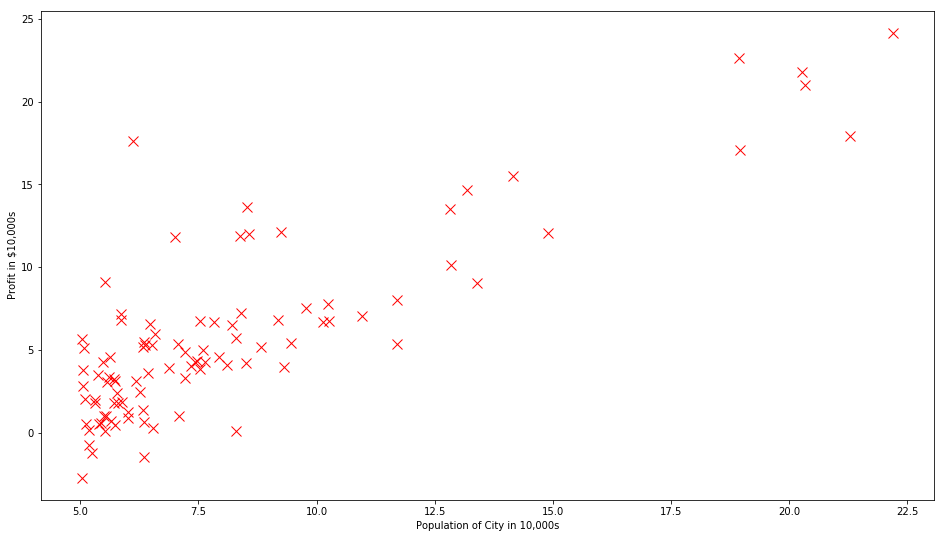

In [4]:
# visualize the data
plt.figure(figsize=(16,9))
plt.plot(X[:,1], Y[:,0], 'rx', markersize=10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [5]:
# Gradient descent -> iteration
# øj = øj - alfa * derivative term

# global variables
iterations = 1500
a = 0.01 # learning curve: alfa

# number of training samples
m = Y.size

In [6]:
# hypothesis function
def h(theta, x):
    return np.dot(x, theta)

# cost function
def ComputeCost(theta, x, y):
    return float((1./(2*m))*np.dot((h(theta, x)-y).T, (h(theta, x)-y)))

# test
initial_theta = np.zeros((X.shape[1], 1))
print (ComputeCost(initial_theta, X, Y))

32.072733877455676


In [20]:
# actual gradient descent minimizing routine
def descentGradient(X, theta = np.zeros(2)):
    
#     theta = theta_start
    
    # 用来保存cost function计算结果
    jvec = []
    
    # 用来保存theta计算后的历史
    thetaHistory = []
    
    # theta 的循环
    for numOfIter in range(iterations):
        tempTheta = theta
        jvec.append(ComputeCost(tempTheta, X, Y))
        thetaHistory.append(list(theta[:,0]))
        
        # 同步更新theta
        for j in range (len(tempTheta)):
            # 梯度下降计算的循环
            # 偏导用求完以后的式子，再求和
            tempTheta[j] = theta[j] - a * (1./m) * np.sum((h(initial_theta, X)-Y)*np.array(X[:,j]).reshape(m,1))
        
        theta = tempTheta
    return theta, thetaHistory, jvec


In [8]:
initial_theta = np.zeros((X.shape[1], 1))
# theta 为梯度下降运算后的最终结果
theta, thetaHistory, jvec = descentGradient(X, initial_theta)


(4, 7)

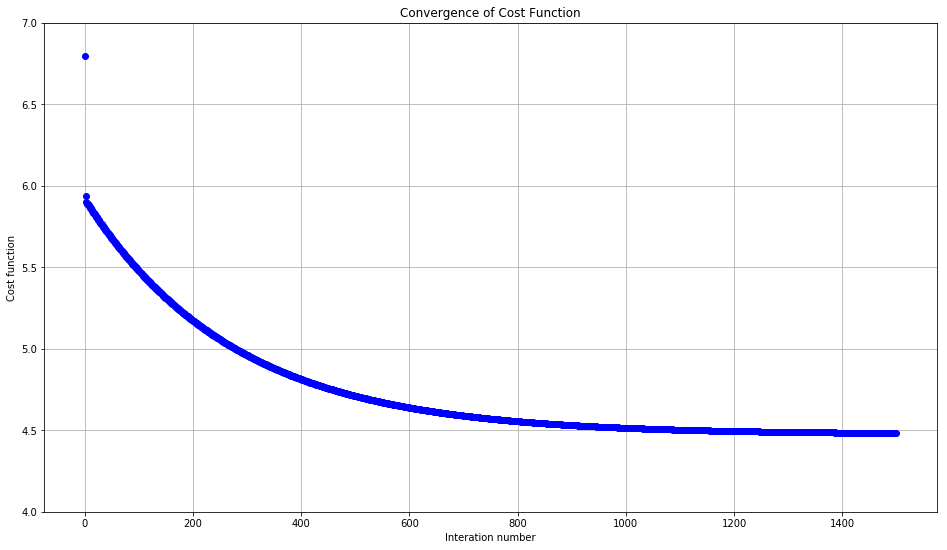

In [9]:
# plot the convergence 集合，收敛 of the cost function
def plotConvengence(jvec):
    plt.figure(figsize=(16,9))
    plt.plot(range(len(jvec)), jvec, 'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Interation number")
    plt.ylabel("Cost function")
    plt.xlim([-0.05*iterations, 1.05*iterations])

plotConvengence(jvec)
plt.ylim([4,7])

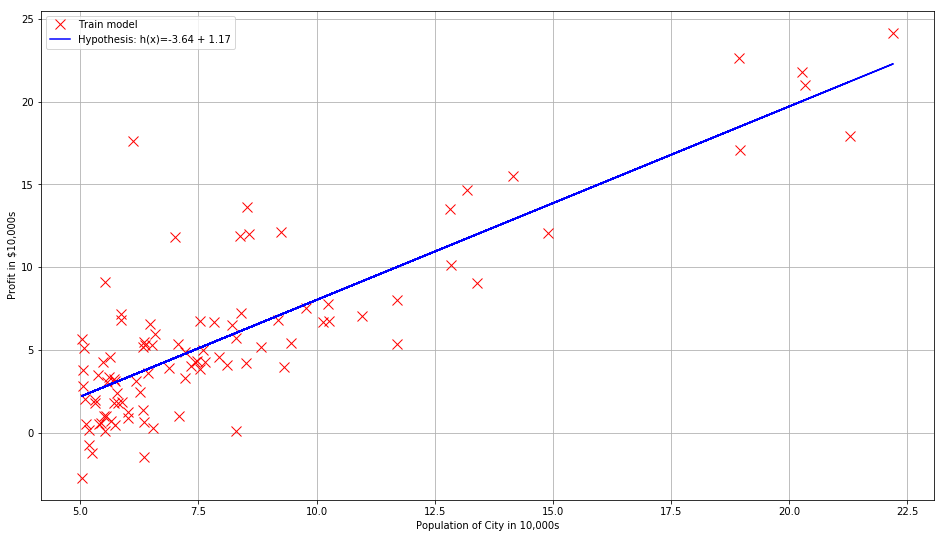

In [10]:
# 绘制线性回归模型 《= plot the line on the top of the data to ensure it looks correct
def getLine_Y(theta, x):
    return theta[0] + theta[1]*x

plt.figure(figsize=(16,9))
plt.plot(X[:,1], Y[:,0], 'rx', markersize=10, label="Train model")
plt.plot(X[:,1], getLine_Y(theta, X[:,1]), 'b-', label='Hypothesis: h(x)=%0.2f + %0.2f'%(theta[0], theta[1]))
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()


In [11]:
# 绘制3D图像
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

<function matplotlib.pyplot.show(*args, **kw)>

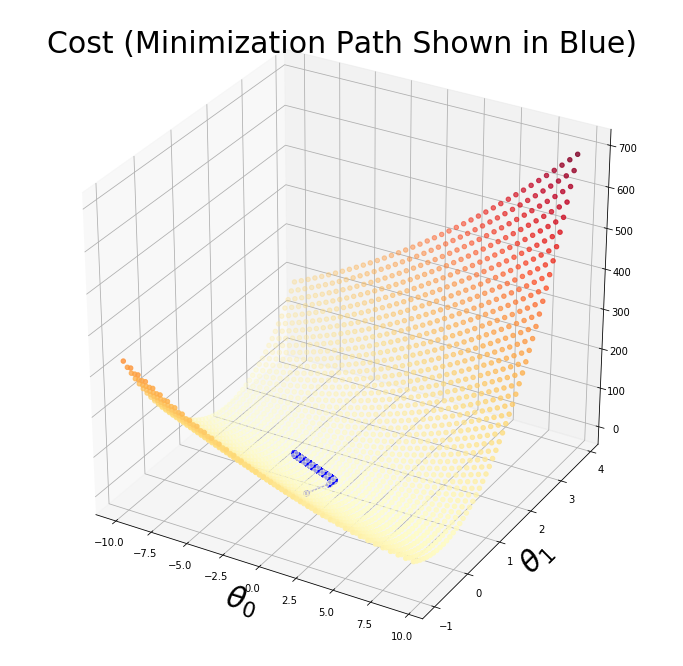

In [12]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection="3d") # 获得axes

# 添加连续的点
pts_x = np.arange(-10, 10, .5)
pts_y = np.arange(-1, 4, .1)
# 存储坐标
myx, myy, myz = [], [], []

# 绘制3-d模型中的点
for pos_x in pts_x:
    for pos_y in pts_y:
        myx.append(pos_x)
        myy.append(pos_y)
        # ComputeCost(theta, x, y) -> theta = [[pos_x], [pos_y]]
        myz.append(ComputeCost(np.array([[pos_x], [pos_y]]), X, Y))
        
# 画散点
ax.scatter(myx, myy, myz, c=np.abs(myz), cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)

plt.plot([x[0] for x in thetaHistory], [x[1] for x in thetaHistory], jvec, 'bo-')
plt.show


In [13]:
# linear regression with multiple variables
data_multi = np.loadtxt('ex1data2.txt', delimiter=',', usecols=(0,1,2), unpack=True)

X = np.transpose(np.array(data_multi[:-1]))
Y = np.transpose(np.array(data_multi[-1:]))

m = Y.size

X = np.insert(X, 0, 1, axis=1)
# print (X)


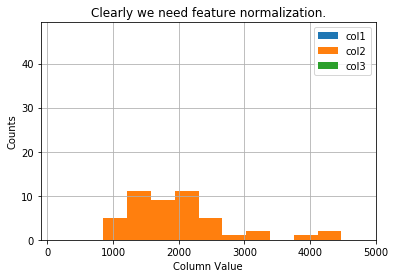

In [14]:
# visualize data
plt.grid(True)
plt.xlim([-100, 5000])

plt.hist(X[:,0], label='col1')
plt.hist(X[:,1], label='col2')
plt.hist(X[:,2], label='col3')

plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend()


In [15]:
# feature normalize
# featuring nomalizing the columns (substract mean, divide by standard deviation)

# store the mean and std for later use
means_his, std_his = [], []

X_norm = X.copy()
# print (X_norm.shape[1])

for icol in range(X_norm.shape[1]):
    means_his.append(np.mean(X_norm[:, icol]))
    std_his.append(np.std(X_norm[:, icol]))
    
    # skip the first column
    if not icol: continue
        
#     print (means_his[-1])
    
    # normal = (X - mean) / std
    X_norm[:, icol] = (X_norm[:, icol] - means_his[-1]) / std_his[-1]
        


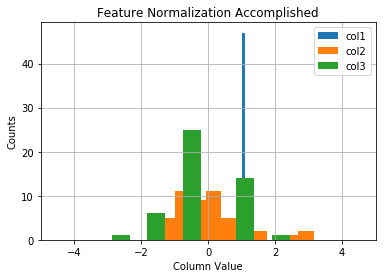

In [16]:
# 归一化后的数据
plt.grid(True)
plt.xlim([-5,5])

plt.hist(X_norm[:,0],label = 'col1')
plt.hist(X_norm[:,1],label = 'col2')
plt.hist(X_norm[:,2],label = 'col3')

plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

47


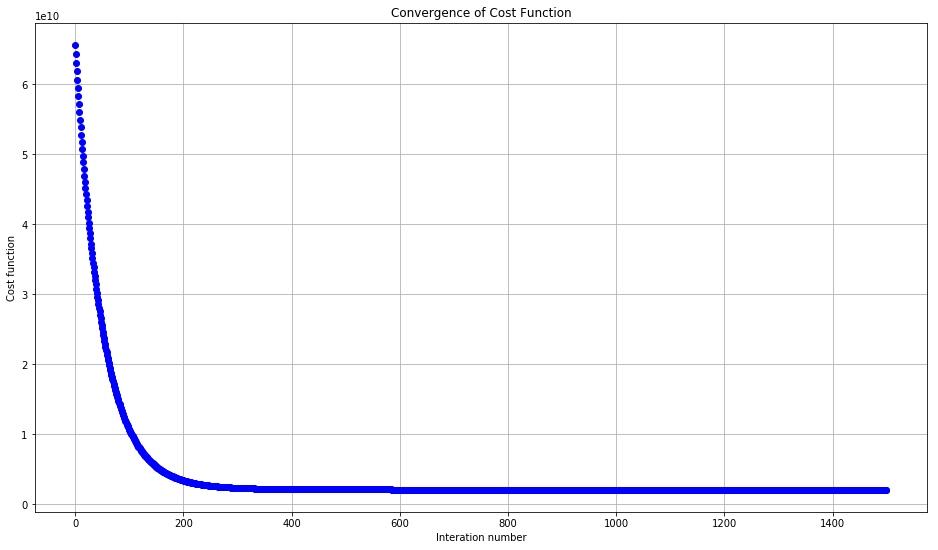

In [21]:
#Run gradient descent with multiple variables, 
#initial theta still set to zeros
initial_theta = np.zeros((X_norm.shape[1], 1)) # 3行1列

print (m)

theta, thetaHistory, jvec = descentGradient(X_norm, initial_theta)

plotConvengence(jvec)
# plt.ylim([4,7])


In [22]:
from numpy.linalg import inv
# implementation of normal equation to find analytic solution to linear regression
"""
标准化方程求解：
ø = (X.T * X)^-1 * X.T * Y 
=> hø(x) = ø.T * X 
=> J(ø) = for 1\2m * np.sum(np.dot((hø(x) - y), hø(x) - y))
"""
def normEquation(X, Y):
    # inv =》 倒数 or -1次方
    return np.dot(np.dot(inv(np.dot(X.T, X)), X.T), Y)


In [23]:
print ("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
print ("$%0.2f" % float(h(normEquation(X, Y),[1,1650.,3])))

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$293081.46


In [27]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
print (a[:-1], '\n') # 除最后一行外
print (a[-1:], '\n') # 只取最后一行
print (a[::-1], '\n') # inverse 倒着取

[[1 2 3]
 [4 5 6]] 

[[7 8 9]] 

[[7 8 9]
 [4 5 6]
 [1 2 3]] 



In [56]:
a = range(1,10)
print (len(a))
print (np.arange(-10, 10, 1))

9
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
